In [1]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [3]:
# Resizing all the images
IMAGE_SIZE = [224, 224]
num_classes = 6

In [4]:
# Path to the dataset folder
data_path = '/kaggle/input/dermacareai-trainingdataset/datasetskindieases'

In [5]:
class_names = os.listdir(data_path)
num_classes = len(class_names)

total_images = 0  
print(f"Total Classes: {num_classes}")
print("Number of Images per Class:")
for class_name in class_names:
    num_images = len(os.listdir(os.path.join(data_path, class_name)))
    total_images += num_images  
    print(f"{class_name}: {num_images}")

print(f"Total Number of Images: {total_images}")  

Total Classes: 6
Number of Images per Class:
Eczema: 537
Tinea Ringworm Candidiasis: 500
Melanoma: 536
Acne: 500
Actinic Keratosis: 501
Healthy Skin: 537
Total Number of Images: 3111


In [6]:

train_datagen = ImageDataGenerator(
    rescale=1./255,  
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    brightness_range=[0.8, 1.2],
    validation_split=0.2  
)

valid_datagen = ImageDataGenerator(
    rescale=1./255,  
    validation_split=0.2  # 20% data for validation
)


In [7]:
# Loading the training and validation data
train_data = train_datagen.flow_from_directory(
    directory=data_path,
    target_size=IMAGE_SIZE,
    batch_size=32,
    class_mode='categorical',
    subset='training',  # 80% for training
)

Found 2484 images belonging to 6 classes.


In [8]:
valid_data = valid_datagen.flow_from_directory(
    directory=data_path,
    target_size=IMAGE_SIZE,
    batch_size=32,
    class_mode='categorical',
    subset='validation',  # 20% for validation
)


Found 620 images belonging to 6 classes.


In [10]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation="relu", input_shape=(224, 224, 3), padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation="relu", padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation="relu", padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation="relu", padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation="relu", padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))


model.add(Conv2D(512, (3,3), activation="relu", padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(512, (3,3), activation="relu", padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation="softmax"))


In [11]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 224, 224, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 56, 56, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 56, 56, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 14, 14, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 14, 14, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 7, 7, 512)           │         590,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 7, 7, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,562,758 (13.59 MB)

 Trainable params: 3,559,878 (13.58 MB)

 Non-trainable params: 2,880 (11.25 KB)

In [15]:
from tensorflow.keras import optimizers
model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


In [16]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1)

In [18]:
cnn_history = model.fit(train_data, validation_data=valid_data, epochs=20, callbacks=[lr_reduce])

Epoch 1/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 49s 579ms/step - accuracy: 0.3582 - loss: 1.9611 - val_accuracy: 0.3403 - val_loss: 1.5420 - learning_rate: 0.0010
Epoch 2/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 43s 507ms/step - accuracy: 0.4541 - loss: 1.4043 - val_accuracy: 0.2177 - val_loss: 1.8480 - learning_rate: 0.0010
Epoch 3/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 43s 509ms/step - accuracy: 0.4976 - loss: 1.3054 - val_accuracy: 0.2597 - val_loss: 1.9839 - learning_rate: 0.0010
Epoch 4/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 43s 507ms/step - accuracy: 0.5134 - loss: 1.2318 - val_accuracy: 0.4081 - val_loss: 1.3824 - learning_rate: 0.0010
Epoch 5/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 44s 510ms/step - accuracy: 0.5419 - loss: 1.1828 - val_accuracy: 0.5097 - val_loss: 1.4330 - learning_rate: 0.0010
Epoch 6/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 44s 512ms/step - accuracy: 0.5866 - loss: 1.1035 - val_accuracy: 0.4097 - val_loss: 2.0684 - learning_rate: 0.0010
Epoch 7/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 43s 505ms/step - accuracy: 0.5564 - loss: 1.

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# training and validation accuracy and loss
def plot_history(history):
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()

    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

# confusion matrix
def plot_confusion_matrix(model, generator):
 
    val_labels = np.concatenate([generator.__next__()[1] for _ in range(len(generator))])  
    val_labels = np.argmax(val_labels, axis=1)

    val_preds = model.predict(generator)
    val_preds = np.argmax(val_preds, axis=1)

    # Confusion matrix
    cm = confusion_matrix(val_labels, val_preds)
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    # Classification report
    print('Classification Report')
    report = classification_report(val_labels, val_preds, target_names=generator.class_indices.keys(), zero_division=0)
    print(report)

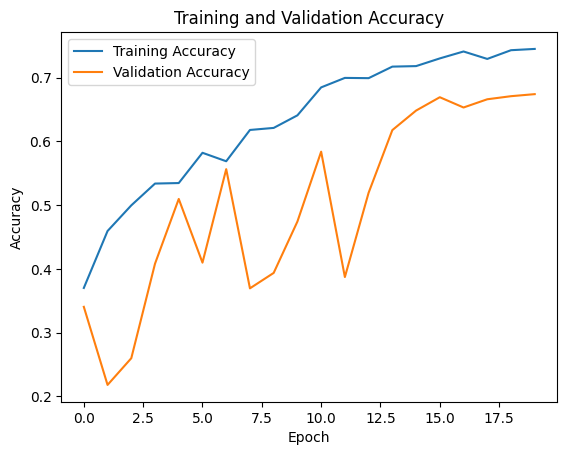

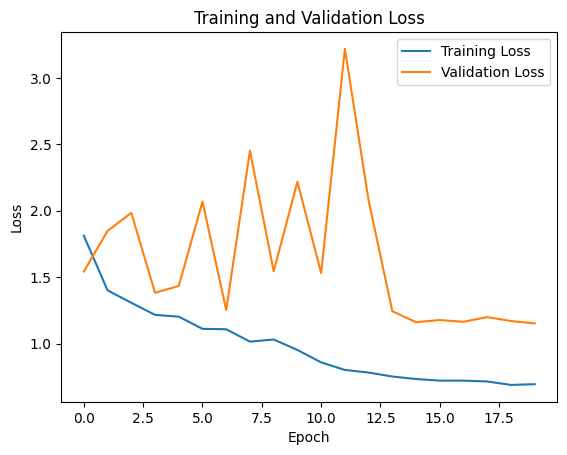

20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 196ms/step


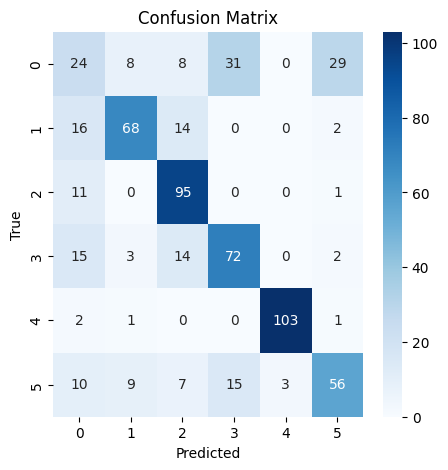

Classification Report
                            precision    recall  f1-score   support

                      Acne       0.31      0.24      0.27       100
         Actinic Keratosis       0.76      0.68      0.72       100
                    Eczema       0.69      0.89      0.78       107
              Healthy Skin       0.61      0.68      0.64       106
                  Melanoma       0.97      0.96      0.97       107
Tinea Ringworm Candidiasis       0.62      0.56      0.59       100

                  accuracy                           0.67       620
                 macro avg       0.66      0.67      0.66       620
              weighted avg       0.66      0.67      0.66       620



In [20]:
# Plot history and confusion matrix
plot_history(cnn_history)
plot_confusion_matrix(model, valid_data)

In [22]:
model.save('/kaggle/working/cnn_final_model.h5')

In [21]:
import numpy as np
print(np.bincount(train_data.classes))


[400 401 430 424 429 400]


**CNN Model evaluation on unseen data:** 7 out of 12 correct predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


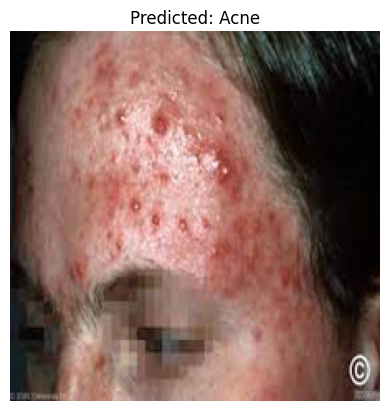

Model Prediction: Acne


In [25]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import Image 


model = load_model('/kaggle/working/cnn_final_model.h5')


class_names = list(train_data.class_indices.keys())  

def predict_image(image_path, model, class_names):
 
    if not os.path.exists(image_path):
        print(f"Error: The file '{image_path}' does not exist.")
        return None

    try:
        img = Image.open(image_path).convert("RGB")  
        img = img.resize((224, 224))  
        img = img_to_array(img) / 255.0  
        img = np.expand_dims(img, axis=0)  

        prediction = model.predict(img)
        predicted_class = np.argmax(prediction)  
        predicted_label = class_names[predicted_class] 

    
        plt.imshow(img[0])  
        plt.title(f"Predicted: {predicted_label}")
        plt.axis('off')
        plt.show()

        return predicted_label

    except Exception as e:
        print(f"Error loading image: {e}")
        return None


image_path = "/kaggle/input/dermacareai-testdataset/Sample_dataset/acne_test_sample.jpg" 
predicted_class = predict_image(image_path, model, class_names)

if predicted_class:
    print(f"Model Prediction: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


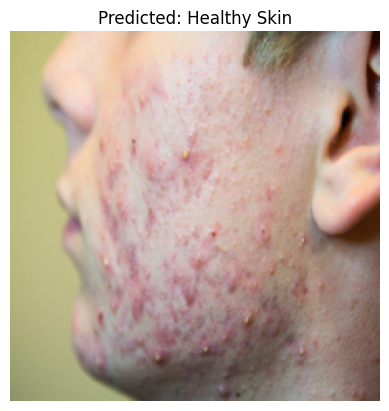

Model Prediction: Healthy Skin


In [27]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import Image


model = load_model('/kaggle/working/cnn_final_model.h5')

class_names = list(train_data.class_indices.keys())  

def predict_image(image_path, model, class_names):
 
    if not os.path.exists(image_path):
        print(f"Error: The file '{image_path}' does not exist.")
        return None
 
    try:
        img = Image.open(image_path).convert("RGB")  
        img = img.resize((224, 224))  
        img = img_to_array(img) / 255.0  
        img = np.expand_dims(img, axis=0)  
      
        prediction = model.predict(img)
        predicted_class = np.argmax(prediction)  
        predicted_label = class_names[predicted_class] 

      
        plt.imshow(img[0])  
        plt.title(f"Predicted: {predicted_label}")
        plt.axis('off')
        plt.show()

        return predicted_label

    except Exception as e:
        print(f"Error loading image: {e}")
        return None


image_path = "/kaggle/input/dermacareai-testdataset/Sample_dataset/acne_test_sample2.jpg" 
predicted_class = predict_image(image_path, model, class_names)

if predicted_class:
    print(f"Model Prediction: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


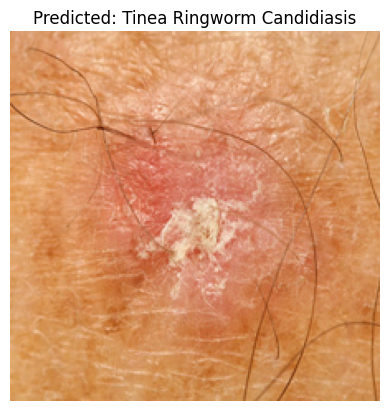

Model Prediction: Tinea Ringworm Candidiasis


In [28]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import Image 


model = load_model('/kaggle/working/cnn_final_model.h5')

class_names = list(train_data.class_indices.keys())  

def predict_image(image_path, model, class_names):
 
    if not os.path.exists(image_path):
        print(f"Error: The file '{image_path}' does not exist.")
        return None

    try:
        img = Image.open(image_path).convert("RGB")  
        img = img.resize((224, 224))  
        img = img_to_array(img) / 255.0  
        img = np.expand_dims(img, axis=0)  
 
        prediction = model.predict(img)
        predicted_class = np.argmax(prediction)  
        predicted_label = class_names[predicted_class] 

        plt.imshow(img[0])  
        plt.title(f"Predicted: {predicted_label}")
        plt.axis('off')
        plt.show()

        return predicted_label

    except Exception as e:
        print(f"Error loading image: {e}")
        return None

image_path = "/kaggle/input/dermacareai-testdataset/Sample_dataset/actinic-keratosis_test_sample.jpg" 

predicted_class = predict_image(image_path, model, class_names)

if predicted_class:
    print(f"Model Prediction: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


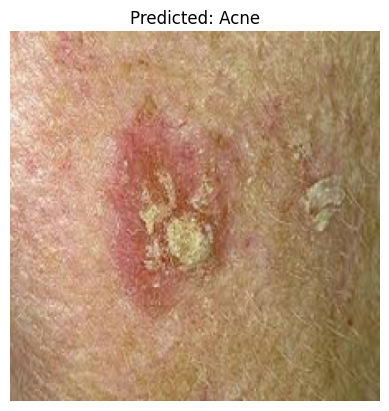

Model Prediction: Acne


In [29]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import Image 


model = load_model('/kaggle/working/cnn_final_model.h5')

class_names = list(train_data.class_indices.keys())  

def predict_image(image_path, model, class_names):
 
    if not os.path.exists(image_path):
        print(f"Error: The file '{image_path}' does not exist.")
        return None

    try:
        img = Image.open(image_path).convert("RGB")  
        img = img.resize((224, 224))  
        img = img_to_array(img) / 255.0  
        img = np.expand_dims(img, axis=0)  
 
        prediction = model.predict(img)
        predicted_class = np.argmax(prediction)  
        predicted_label = class_names[predicted_class] 

        
        plt.imshow(img[0])  
        plt.title(f"Predicted: {predicted_label}")
        plt.axis('off')
        plt.show()

        return predicted_label

    except Exception as e:
        print(f"Error loading image: {e}")
        return None

image_path = "/kaggle/input/dermacareai-testdataset/Sample_dataset/actinic-keratosis_test_sample2.jpg" 

predicted_class = predict_image(image_path, model, class_names)

if predicted_class:
    print(f"Model Prediction: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 824ms/step


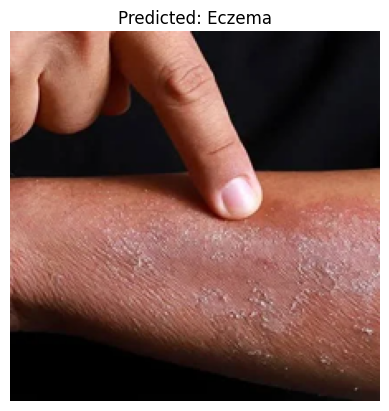

Model Prediction: Eczema


In [30]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import Image 


model = load_model('/kaggle/working/cnn_final_model.h5')

class_names = list(train_data.class_indices.keys())  

def predict_image(image_path, model, class_names):
 
    if not os.path.exists(image_path):
        print(f"Error: The file '{image_path}' does not exist.")
        return None


    try:
        img = Image.open(image_path).convert("RGB")  
        img = img.resize((224, 224))  
        img = img_to_array(img) / 255.0  
        img = np.expand_dims(img, axis=0)  
       
        prediction = model.predict(img)
        predicted_class = np.argmax(prediction)  
        predicted_label = class_names[predicted_class] 

       
        plt.imshow(img[0])  
        plt.title(f"Predicted: {predicted_label}")
        plt.axis('off')
        plt.show()

        return predicted_label

    except Exception as e:
        print(f"Error loading image: {e}")
        return None

image_path = "/kaggle/input/dermacareai-testdataset/Sample_dataset/eczema_test_sample.jpg" 


predicted_class = predict_image(image_path, model, class_names)

if predicted_class:
    print(f"Model Prediction: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


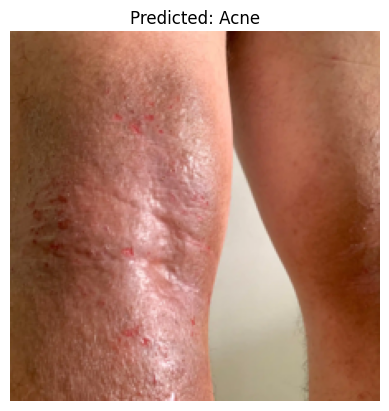

Model Prediction: Acne


In [31]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import Image 


model = load_model('/kaggle/working/cnn_final_model.h5')

class_names = list(train_data.class_indices.keys())  

def predict_image(image_path, model, class_names):
 
    if not os.path.exists(image_path):
        print(f"Error: The file '{image_path}' does not exist.")
        return None

    
    try:
        img = Image.open(image_path).convert("RGB")  
        img = img.resize((224, 224))  
        img = img_to_array(img) / 255.0  
        img = np.expand_dims(img, axis=0)  
   
        prediction = model.predict(img)
        predicted_class = np.argmax(prediction)  
        predicted_label = class_names[predicted_class] 

        plt.imshow(img[0])  
        plt.title(f"Predicted: {predicted_label}")
        plt.axis('off')
        plt.show()

        return predicted_label

    except Exception as e:
        print(f"Error loading image: {e}")
        return None

image_path = "/kaggle/input/dermacareai-testdataset/Sample_dataset/eczema_test_sample2.jpg" 


predicted_class = predict_image(image_path, model, class_names)

if predicted_class:
    print(f"Model Prediction: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


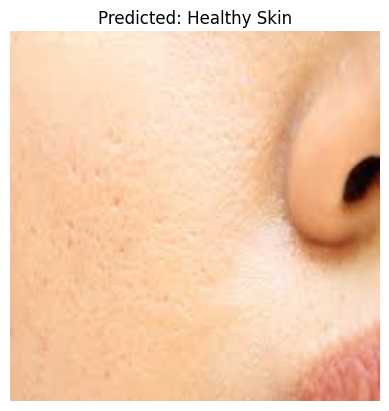

Model Prediction: Healthy Skin


In [32]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import Image 



model = load_model('/kaggle/working/cnn_final_model.h5')

class_names = list(train_data.class_indices.keys())  

def predict_image(image_path, model, class_names):
 
    if not os.path.exists(image_path):
        print(f"Error: The file '{image_path}' does not exist.")
        return None

    try:
        img = Image.open(image_path).convert("RGB")  
        img = img.resize((224, 224))  
        img = img_to_array(img) / 255.0  
        img = np.expand_dims(img, axis=0)  
 
        
        prediction = model.predict(img)
        predicted_class = np.argmax(prediction)  
        predicted_label = class_names[predicted_class] 

        plt.imshow(img[0])  
        plt.title(f"Predicted: {predicted_label}")
        plt.axis('off')
        plt.show()

        return predicted_label

    except Exception as e:
        print(f"Error loading image: {e}")
        return None

image_path = "/kaggle/input/dermacareai-testdataset/Sample_dataset/healthyskin_test_sample.jpg" 


predicted_class = predict_image(image_path, model, class_names)

if predicted_class:
    print(f"Model Prediction: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


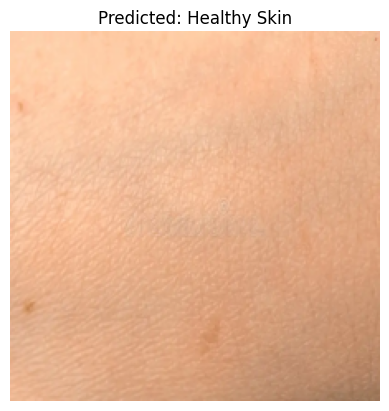

Model Prediction: Healthy Skin


In [33]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import Image 

model = load_model('/kaggle/working/cnn_final_model.h5')

class_names = list(train_data.class_indices.keys())  

def predict_image(image_path, model, class_names):
 
    if not os.path.exists(image_path):
        print(f"Error: The file '{image_path}' does not exist.")
        return None

    
    try:
        img = Image.open(image_path).convert("RGB")  
        img = img.resize((224, 224))  
        img = img_to_array(img) / 255.0  
        img = np.expand_dims(img, axis=0)  
    
        
        prediction = model.predict(img)
        predicted_class = np.argmax(prediction)  
        predicted_label = class_names[predicted_class] 

     
        
        plt.imshow(img[0])  
        plt.title(f"Predicted: {predicted_label}")
        plt.axis('off')
        plt.show()

        return predicted_label

    except Exception as e:
        print(f"Error loading image: {e}")
        return None

image_path = "/kaggle/input/dermacareai-testdataset/Sample_dataset/healthyskin_test_sample2.jpg" 


predicted_class = predict_image(image_path, model, class_names)

if predicted_class:
    print(f"Model Prediction: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


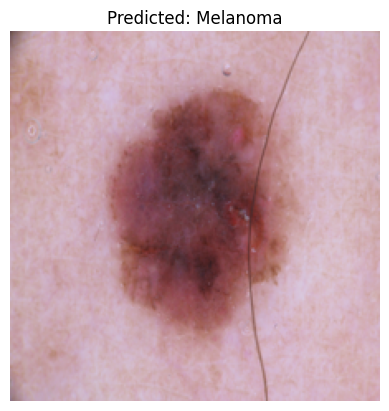

Model Prediction: Melanoma


In [34]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import Image 


model = load_model('/kaggle/working/cnn_final_model.h5')

class_names = list(train_data.class_indices.keys())  

def predict_image(image_path, model, class_names):
 
    if not os.path.exists(image_path):
        print(f"Error: The file '{image_path}' does not exist.")
        return None

    try:
        img = Image.open(image_path).convert("RGB")  
        img = img.resize((224, 224))  
        img = img_to_array(img) / 255.0  
        img = np.expand_dims(img, axis=0)  
      
        
        prediction = model.predict(img)
        predicted_class = np.argmax(prediction)  
        predicted_label = class_names[predicted_class] 

       
        plt.imshow(img[0])  
        plt.title(f"Predicted: {predicted_label}")
        plt.axis('off')
        plt.show()

        return predicted_label

    except Exception as e:
        print(f"Error loading image: {e}")
        return None

image_path = "/kaggle/input/dermacareai-testdataset/Sample_dataset/melanoma_test_sample.jpg" 


predicted_class = predict_image(image_path, model, class_names)

if predicted_class:
    print(f"Model Prediction: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


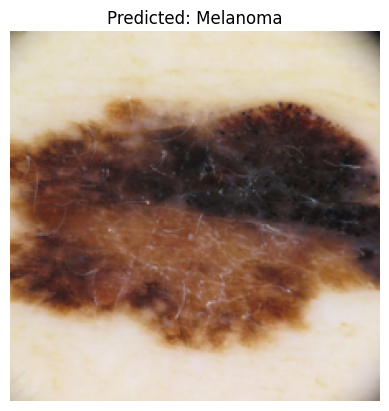

Model Prediction: Melanoma


In [35]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import Image 

model = load_model('/kaggle/working/cnn_final_model.h5')

class_names = list(train_data.class_indices.keys())  

def predict_image(image_path, model, class_names):
 
    if not os.path.exists(image_path):
        print(f"Error: The file '{image_path}' does not exist.")
        return None

    try:
        img = Image.open(image_path).convert("RGB")  
        img = img.resize((224, 224))  
        img = img_to_array(img) / 255.0  
        img = np.expand_dims(img, axis=0)  
  
        prediction = model.predict(img)
        predicted_class = np.argmax(prediction)  
        predicted_label = class_names[predicted_class] 

     
        plt.imshow(img[0])  
        plt.title(f"Predicted: {predicted_label}")
        plt.axis('off')
        plt.show()

        return predicted_label

    except Exception as e:
        print(f"Error loading image: {e}")
        return None

image_path = "/kaggle/input/dermacareai-testdataset/Sample_dataset/melanoma_test_sample2.JPG" 


predicted_class = predict_image(image_path, model, class_names)

if predicted_class:
    print(f"Model Prediction: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


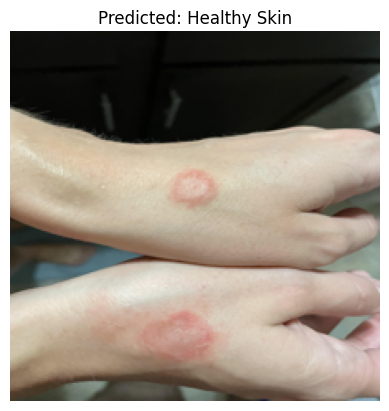

Model Prediction: Healthy Skin


In [40]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import Image 

model = load_model('/kaggle/working/cnn_final_model.h5')

class_names = list(train_data.class_indices.keys())  

def predict_image(image_path, model, class_names):
 
    if not os.path.exists(image_path):
        print(f"Error: The file '{image_path}' does not exist.")
        return None

    try:
        img = Image.open(image_path).convert("RGB")  
        img = img.resize((224, 224))  
        img = img_to_array(img) / 255.0  
        img = np.expand_dims(img, axis=0)  
    
        prediction = model.predict(img)
        predicted_class = np.argmax(prediction)  
        predicted_label = class_names[predicted_class] 

     
        plt.imshow(img[0])  
        plt.title(f"Predicted: {predicted_label}")
        plt.axis('off')
        plt.show()

        return predicted_label

    except Exception as e:
        print(f"Error loading image: {e}")
        return None

image_path = "/kaggle/input/dermacareai-testdataset/Sample_dataset/ringworm_test_sample.jpg" 


predicted_class = predict_image(image_path, model, class_names)

if predicted_class:
    print(f"Model Prediction: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


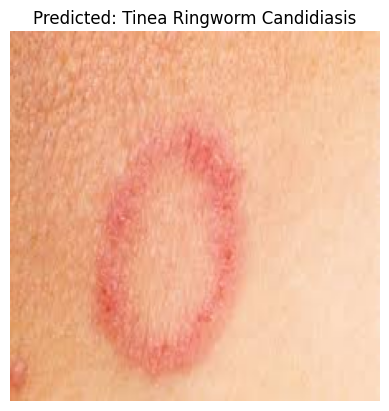

Model Prediction: Tinea Ringworm Candidiasis


In [41]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import Image 

model = load_model('/kaggle/working/cnn_final_model.h5')

class_names = list(train_data.class_indices.keys())  

def predict_image(image_path, model, class_names):
 
    if not os.path.exists(image_path):
        print(f"Error: The file '{image_path}' does not exist.")
        return None

    try:
        img = Image.open(image_path).convert("RGB")  
        img = img.resize((224, 224))  
        img = img_to_array(img) / 255.0  
        img = np.expand_dims(img, axis=0)  
    
        prediction = model.predict(img)
        predicted_class = np.argmax(prediction)  
        predicted_label = class_names[predicted_class] 

     
        plt.imshow(img[0])  
        plt.title(f"Predicted: {predicted_label}")
        plt.axis('off')
        plt.show()

        return predicted_label

    except Exception as e:
        print(f"Error loading image: {e}")
        return None

image_path = "/kaggle/input/dermacareai-testdataset/Sample_dataset/ringworm_test_sample2.jpg" 


predicted_class = predict_image(image_path, model, class_names)

if predicted_class:
    print(f"Model Prediction: {predicted_class}")